### For reference:
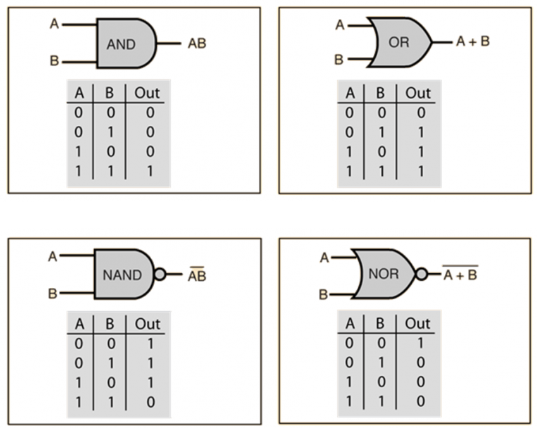

1. Create a Python implementation of the perceptron learning algorithm to train neural networks for the following boolean functions:
a) AND, b) OR, c) NAND, d) XOR. 
- Begin by manually assigning weights and displaying the number of errors between positive and negative outcomes.
- Then, utilize the perceptron learning algorithm to adjust the weights and eliminate these errors by finding the optimal weight configuration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(num_inputs + 1) * 2 - 1  # Initialize weights randomly between -1 and 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.errors = []

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            errors = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
                errors += int(error != 0)
                if error != 0:
                    print("Input:", inputs, "| Expected Output:", label, "| Predicted Output:", prediction, "| Error:", error)
            self.errors.append(errors)
            if errors == 0:
                break  # Stop training if all outputs are correct

In [3]:
# Boolean functions
def AND(inputs):
    return int(all(inputs))

def OR(inputs):
    return int(any(inputs))

def NAND(inputs):
    return int(not all(inputs))

def XOR(inputs):
    return int(sum(inputs) % 2 != 0)

In [4]:
# Training data
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_AND = np.array([AND(x) for x in training_inputs])
labels_OR = np.array([OR(x) for x in training_inputs])
labels_NAND = np.array([NAND(x) for x in training_inputs])
labels_XOR = np.array([XOR(x) for x in training_inputs])


In [5]:
# Training the perceptrons
perceptron_AND = Perceptron(2)
perceptron_AND.train(training_inputs, labels_AND)

perceptron_OR = Perceptron(2)
perceptron_OR.train(training_inputs, labels_OR)

perceptron_NAND = Perceptron(2)
perceptron_NAND.train(training_inputs, labels_NAND)

perceptron_XOR = Perceptron(2)
perceptron_XOR.train(training_inputs, labels_XOR)


Input: [0 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [0 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 1] | Expected Output: 1 | Predicted Output: 0 | Error: 1
Input: [0 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 1] | Expected Output: 1 | Predicted Output: 0 | Error: 1
Input: [0 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 1] | Expected Output: 1 | Predicted Output: 0 | Error: 1
Input: [1 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 1] | Expected Output: 1 | Predicted Output: 0 | Error: 1
Input: [1 0] | Expected Output: 0 | Predicted Output: 1 | Error: -1
Input: [1 0] | Expected Output: 0 | Predicted Output

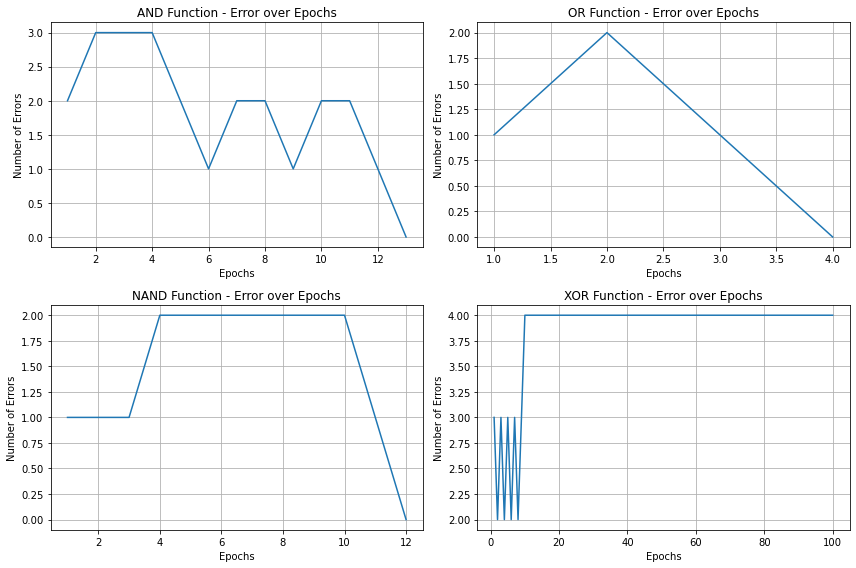

In [6]:
# Plotting error over epochs
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(perceptron_AND.errors) + 1), perceptron_AND.errors)
plt.title('AND Function - Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(perceptron_OR.errors) + 1), perceptron_OR.errors)
plt.title('OR Function - Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, len(perceptron_NAND.errors) + 1), perceptron_NAND.errors)
plt.title('NAND Function - Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(perceptron_XOR.errors) + 1), perceptron_XOR.errors)
plt.title('XOR Function - Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.grid(True)

plt.tight_layout()
plt.show()

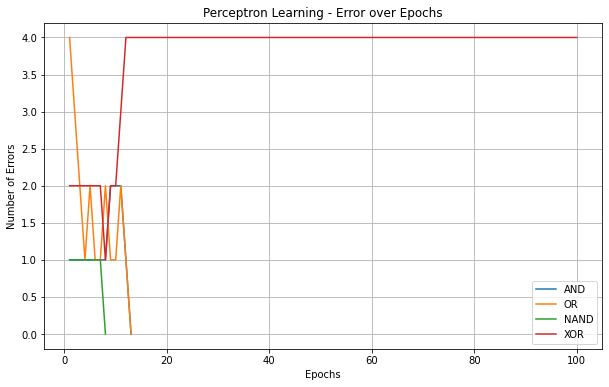

In [6]:
# Plotting error over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(perceptron_AND.errors) + 1), perceptron_AND.errors, label='AND')
plt.plot(range(1, len(perceptron_OR.errors) + 1), perceptron_OR.errors, label='OR')
plt.plot(range(1, len(perceptron_NAND.errors) + 1), perceptron_NAND.errors, label='NAND')
plt.plot(range(1, len(perceptron_XOR.errors) + 1), perceptron_XOR.errors, label='XOR')
plt.title('Perceptron Learning - Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.legend()
plt.grid(True)
plt.show()

2 Develop a Python script to utilize the gradient descent algorithm for locating the global minima of the following equations. Additionally, ensure the program prints the number of iterations taken to identify the global minima.

- i) f(x) = x^2 - 2x + 2

In [13]:
def gradient_descent(f, f_prime, x_init, learning_rate=0.1, epsilon=1e-6, max_iters=1000):
    x = x_init
    iterations = 0
    while True:
        gradient = f_prime(x)
        x_new = x - learning_rate * gradient
        error = f(x_new)
        print("Iteration:", iterations, "| x:", x, "| Error:", error)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
        iterations += 1
        if iterations >= max_iters:
            print("Max iterations reached.")
            break
    return x, iterations

In [14]:
def function(x):
    return x**2 - 2*x + 2

In [15]:
def derivative(x):
    return 2*x - 2

In [16]:
# Initial guess
x_init = 0.0

In [17]:
# Perform gradient descent
minima, iterations = gradient_descent(function, derivative, x_init)

Iteration: 0 | x: 0.0 | Error: 1.6400000000000001
Iteration: 1 | x: 0.2 | Error: 1.4096
Iteration: 2 | x: 0.36000000000000004 | Error: 1.2621440000000002
Iteration: 3 | x: 0.488 | Error: 1.16777216
Iteration: 4 | x: 0.5904 | Error: 1.1073741824
Iteration: 5 | x: 0.67232 | Error: 1.068719476736
Iteration: 6 | x: 0.7378560000000001 | Error: 1.04398046511104
Iteration: 7 | x: 0.7902848 | Error: 1.0281474976710656
Iteration: 8 | x: 0.83222784 | Error: 1.0180143985094818
Iteration: 9 | x: 0.865782272 | Error: 1.0115292150460684
Iteration: 10 | x: 0.8926258176 | Error: 1.0073786976294838
Iteration: 11 | x: 0.9141006540800001 | Error: 1.0047223664828695
Iteration: 12 | x: 0.931280523264 | Error: 1.0030223145490367
Iteration: 13 | x: 0.9450244186112 | Error: 1.0019342813113834
Iteration: 14 | x: 0.95601953488896 | Error: 1.0012379400392852
Iteration: 15 | x: 0.9648156279111679 | Error: 1.0007922816251427
Iteration: 16 | x: 0.9718525023289344 | Error: 1.0005070602400914
Iteration: 17 | x: 0.977

In [18]:
# Print results
print("Global Minima found at:", minima)
print("Number of iterations:", iterations)

Global Minima found at: 0.9999953231947606
Number of iterations: 55


In [105]:
def gradient_descent_2(f, f_prime_x, f_prime_y, x_init, y_init, learning_rate=0.001, epsilon=1e-6, max_iters=10000):
    x = x_init
    y = y_init
    iterations = 0
    
    while True:
        gradient_x = f_prime_x(x, y)
        gradient_y = f_prime_y(x, y)
        x_new = x - learning_rate * gradient_x
        y_new = y - learning_rate * gradient_y
        error = f(x_new, y_new)
        print("Iteration:", iterations, "| x:", x, "| y:", y, "| Error:", error)
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < epsilon:
            break
        x = x_new
        y = y_new
        iterations += 1
        if iterations >= max_iters:
            print("Max iterations reached.")
            break
    return x, y, iterations

In [106]:
def function(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def derivative_x(x, y):
    return -2 * (1 - x) - 400 * x * (y - x**2)

In [107]:
def derivative_y(x, y):
    return 200 * (y - x**2)

In [108]:
# Initial guesses
x_init = 0.0
y_init = 0.0

In [109]:
# Perform gradient descent
minima_x, minima_y, iterations = gradient_descent_2(function, derivative_x, derivative_y, x_init, y_init)

Iteration: 0 | x: 0.0 | y: 0.0 | Error: 0.9960040016
Iteration: 1 | x: 0.002 | y: 0.0 | Error: 0.992023997397219
Iteration: 2 | x: 0.0039959968 | y: 8e-07 | Error: 0.9880599973302564
Iteration: 3 | x: 0.005987980561903519 | y: 3.833598085122049e-06 | Error: 0.9841120445378275
Iteration: 4 | x: 0.007975927901184298 | y: 1.0238060710044516e-05 | Error: 0.9801801990686101
Iteration: 5 | x: 0.009959805751775453 | y: 2.0913533745013645e-05 | Error: 0.9762645281502421
Iteration: 6 | x: 0.011939574262114207 | y: 3.65703731186308e-05 | Error: 0.9723651005139807
Iteration: 7 | x: 0.013915188956541709 | y: 5.776698520701264e-05 | Error: 0.9684819832029068
Iteration: 8 | x: 0.015886602340994965 | y: 8.494008490486218e-05 | Error: 0.9646152398809493
Iteration: 9 | x: 0.017853765089504415 | y: 0.00011842889471207107 | Error: 0.9607649300321468
Iteration: 10 | x: 0.01981662691546746 | y: 0.00015849450134389816 | Error: 0.9569311086738369
Iteration: 11 | x: 0.021775137206727517 | y: 0.000205335341536

In [110]:
# Print results
print("Global Minima found at (x, y):", minima_x, minima_y)
print("Number of iterations:", iterations)

Global Minima found at (x, y): 0.9944009477070963 0.9888107640653774
Number of iterations: 10000


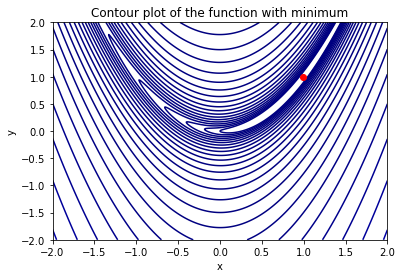

In [111]:
# Visualize the function
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
plt.plot(minima_x, minima_y, 'ro')
plt.title('Contour plot of the function with minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.show()